In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
# %qtconsole

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import xarray as xr

import logging
logging.basicConfig(level=logging.INFO)

# Sorted Spikes

In [3]:
from glob import glob
import os
from src.parameters import PROCESSED_DATA_DIR, STATE_COLORS
from src.visualization import (plot_category_counts, plot_category_duration)

data_type, dim = 'sorted_spikes', '1D'
n_unique_spiking = 3

def add_animal_info(file_path, replay_info):
    animal, day, epoch = file_path.split('/')[-1].split('_')[:3]
    day, epoch = int(day), int(epoch)
    replay_info['animal'] = animal
    replay_info['day'] = day
    replay_info['epoch'] = epoch
    
    return replay_info

file_paths = glob(os.path.join(PROCESSED_DATA_DIR, f'*_{data_type}_{dim}_replay_info.csv'))
replay_info = (pd.concat(
                 [add_animal_info(file_path, pd.read_csv(file_path)) for file_path in file_paths], axis=0)
               .set_index(['animal', 'day', 'epoch', 'ripple_number']))
replay_info = replay_info.loc[replay_info.n_unique_spiking >= n_unique_spiking]

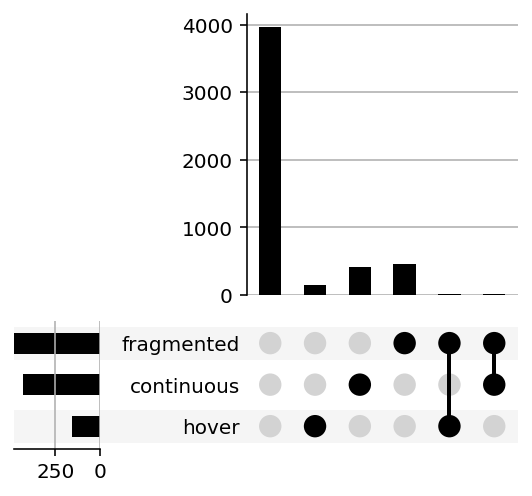

In [4]:
plot_category_counts(replay_info);

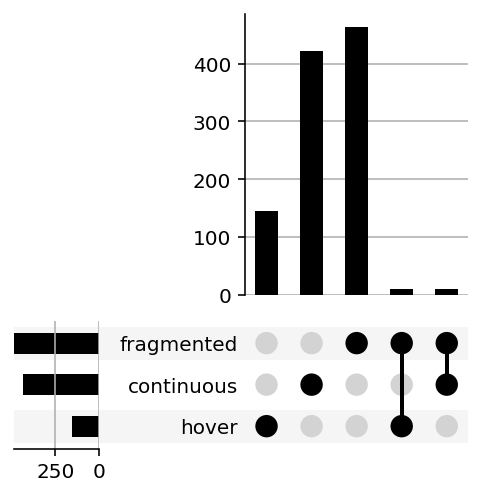

In [5]:
plot_category_counts(replay_info.loc[replay_info.is_classified]);

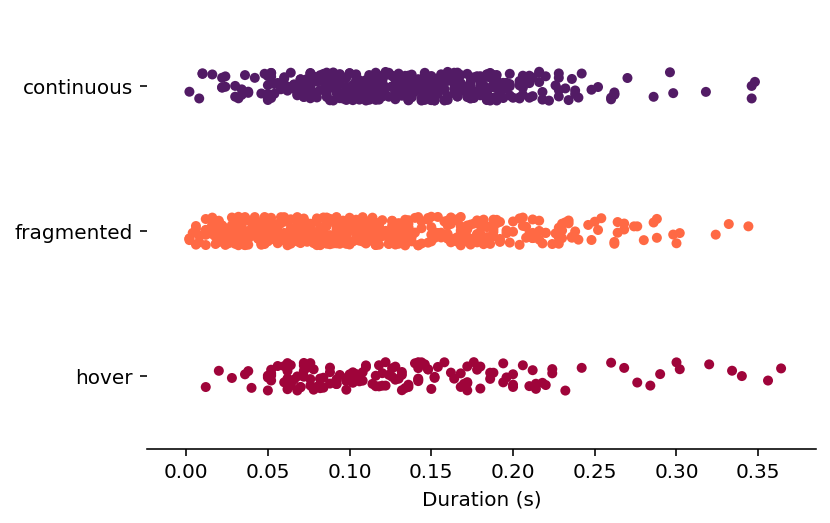

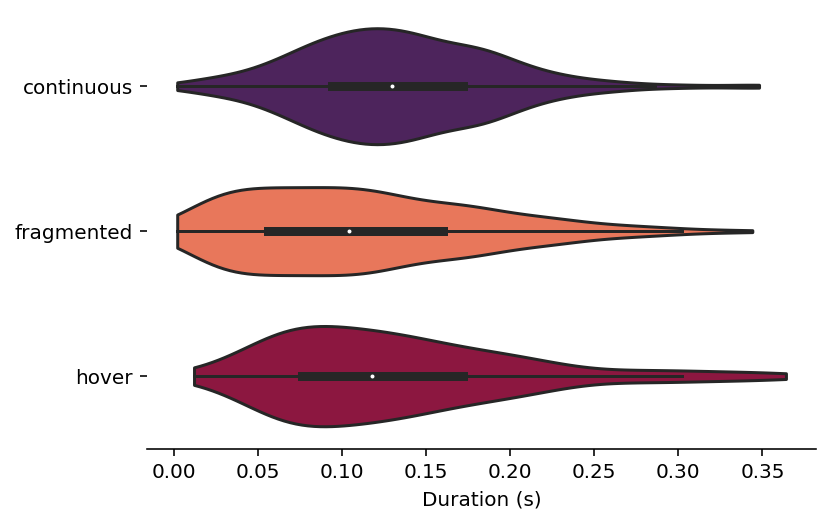

In [6]:
plt.figure()
plot_category_duration(replay_info)


plt.figure()
is_duration_col = replay_info.columns.str.endswith('_duration')
zero_mask = np.isclose(replay_info.loc[:, is_duration_col], 0.0)
sns.violinplot(data=(replay_info.loc[:, is_duration_col].mask(zero_mask)
                    .rename(columns=lambda c: c.split('_')[0])),
              order=['continuous', 'fragmented', 'hover'],
              orient='horizontal',
              palette=STATE_COLORS, cut=0)
plt.xlabel('Duration (s)')
sns.despine(left=True)

Text(0.5, 0, 'Total Duration')

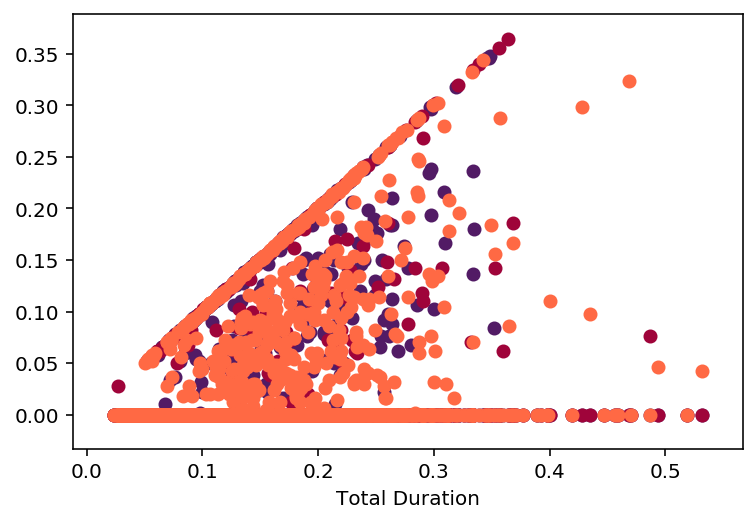

In [7]:
plt.scatter(replay_info.duration, replay_info.continuous_duration, color=STATE_COLORS['continuous'])
plt.scatter(replay_info.duration, replay_info.hover_duration, color=STATE_COLORS['hover'])
plt.scatter(replay_info.duration, replay_info.fragmented_duration, color=STATE_COLORS['fragmented'])
plt.xlabel('Total Duration')

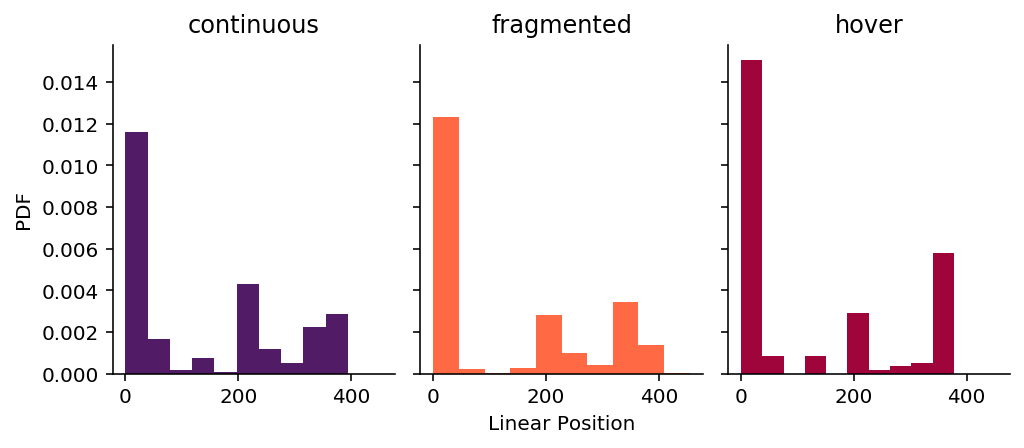

In [8]:
state_names = ['continuous', 'fragmented', 'hover']
fig, axes = plt.subplots(1, len(state_names), figsize=(7, 3),
                         sharex=True, sharey=True, constrained_layout=True)

for ax, state_name in zip(axes.flat, state_names):
    ax.hist(replay_info.loc[replay_info[state_name]].avg_actual_linear_position2,
            density=True, bins=10, color=STATE_COLORS[state_name])
    ax.set_title(state_name)
    
axes.flat[len(state_names) // 2].set_xlabel('Linear Position')
axes[0].set_ylabel('PDF')
sns.despine()

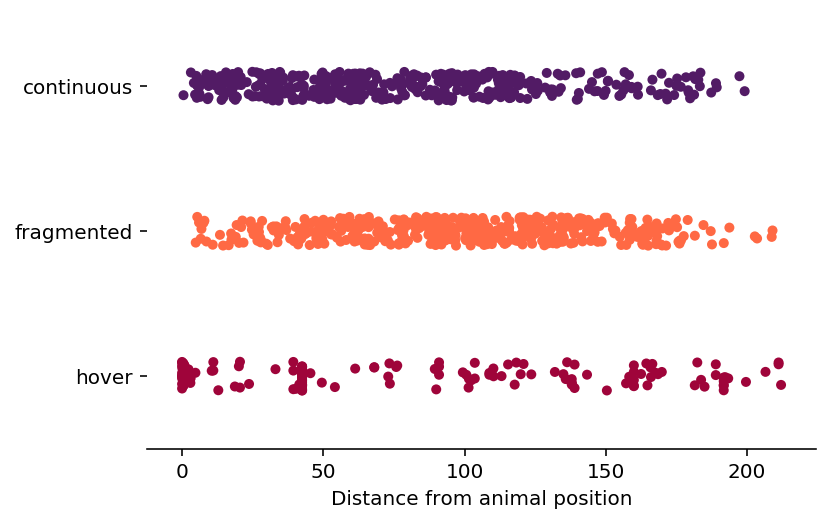

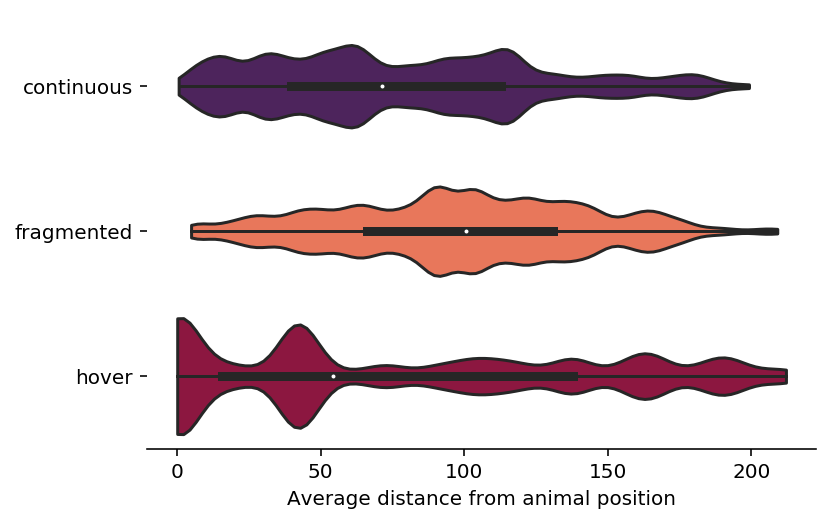

In [9]:
is_col = replay_info.columns.str.endswith('_replay_distance')
sns.stripplot(data=(replay_info.loc[:, is_col]
                    .rename(columns=lambda c: c.split('_')[0])),
              order=['continuous', 'fragmented', 'hover'],
              orient='horizontal',
              palette=STATE_COLORS)
plt.xlabel('Distance from animal position')
sns.despine(left=True)

plt.figure()
is_col = replay_info.columns.str.endswith('_replay_distance')
sns.violinplot(data=(replay_info.loc[:, is_col]
                    .rename(columns=lambda c: c.split('_')[0])),
              order=['continuous', 'fragmented', 'hover'],
              orient='horizontal',
              palette=STATE_COLORS, cut=0, bw=0.1)
plt.xlabel('Average distance from animal position')
sns.despine(left=True)

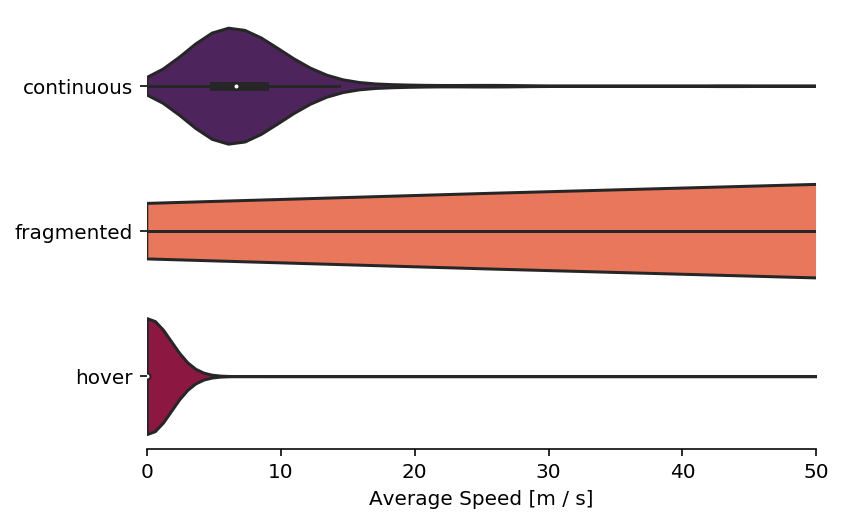

In [10]:
is_col = replay_info.columns.str.endswith('_replay_speed')
sns.violinplot(data=10000 * (replay_info.loc[:, is_col]
                    .rename(columns=lambda c: c.split('_')[0])),
              order=['continuous', 'fragmented', 'hover'],
              orient='horizontal',
              palette=STATE_COLORS, cut=0, scale='width')
plt.xlabel('Average Speed [m / s]')
plt.xlim((-0.001, 50))
sns.despine(left=True)

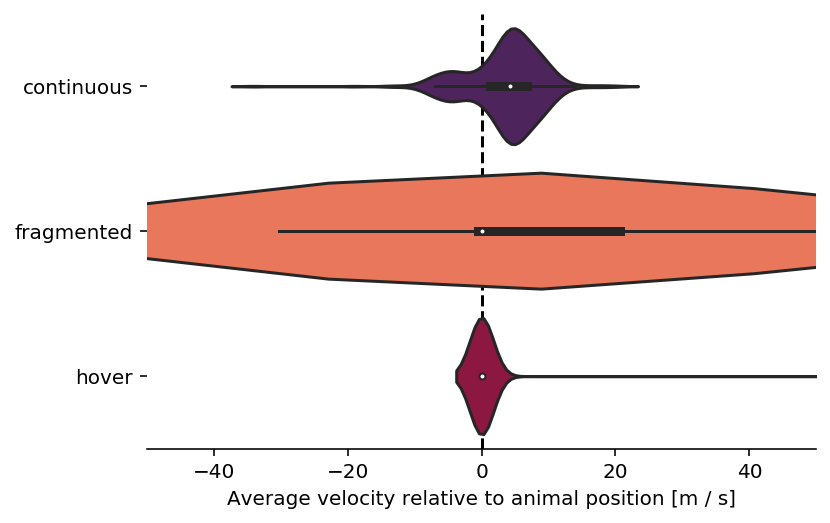

In [11]:
is_col = replay_info.columns.str.endswith('_replay_velocity')
sns.violinplot(data=10000 * (replay_info.loc[:, is_col]
                    .rename(columns=lambda c: c.split('_')[0])),
              order=['continuous', 'fragmented', 'hover'],
              orient='horizontal',
              palette=STATE_COLORS, scale='width')
plt.xlabel('Average velocity relative to animal position [m / s]')
plt.xlim([-50, 50])
plt.axvline(0, color='black', linestyle='--', zorder=0)
sns.despine(left=True)

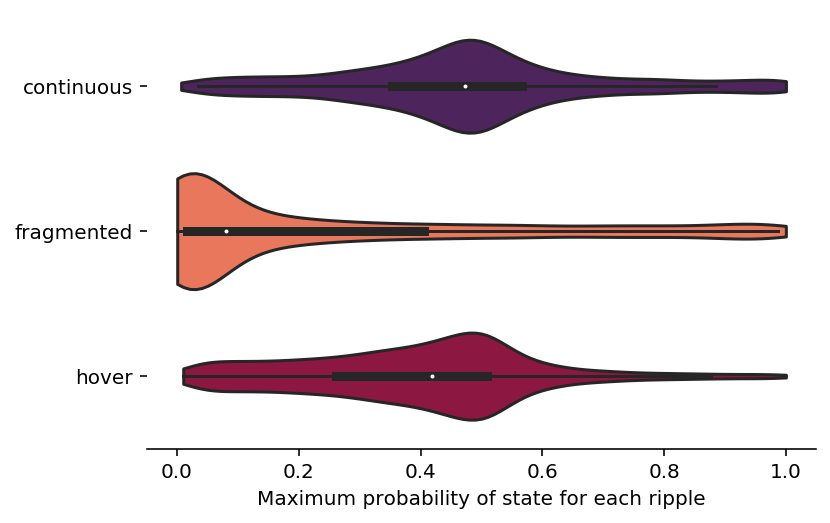

In [12]:
plt.figure()
is_col = replay_info.columns.str.endswith('_max_probability')
sns.violinplot(data=(replay_info.loc[:, is_col]
                    .rename(columns=lambda c: c.split('_')[0])),
              order=['continuous', 'fragmented', 'hover'],
              orient='horizontal',
              palette=STATE_COLORS, cut=0)
plt.xlabel('Maximum probability of state for each ripple')
sns.despine(left=True)

In [13]:
replay_info.reset_index().groupby('animal').hover.sum()

animal
Cor      0.0
bon    101.0
cha      2.0
con      4.0
dav     12.0
dud      3.0
egy      0.0
fra     26.0
gov      7.0
Name: hover, dtype: float64

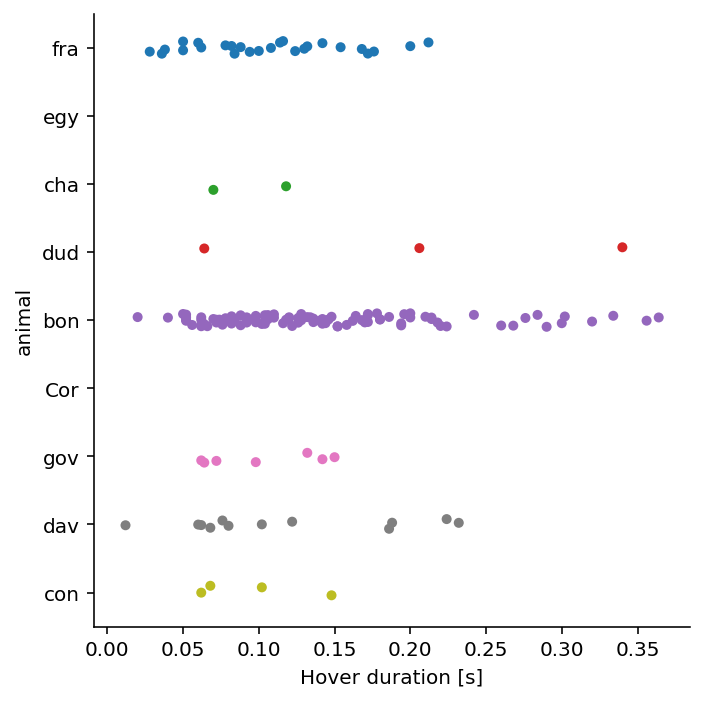

In [14]:
sns.catplot(x='hover_duration', y='animal', data=replay_info.reset_index().replace(0.0, np.nan), kind="strip", jitter=True, aspect=1)
plt.xlabel('Hover duration [s]');

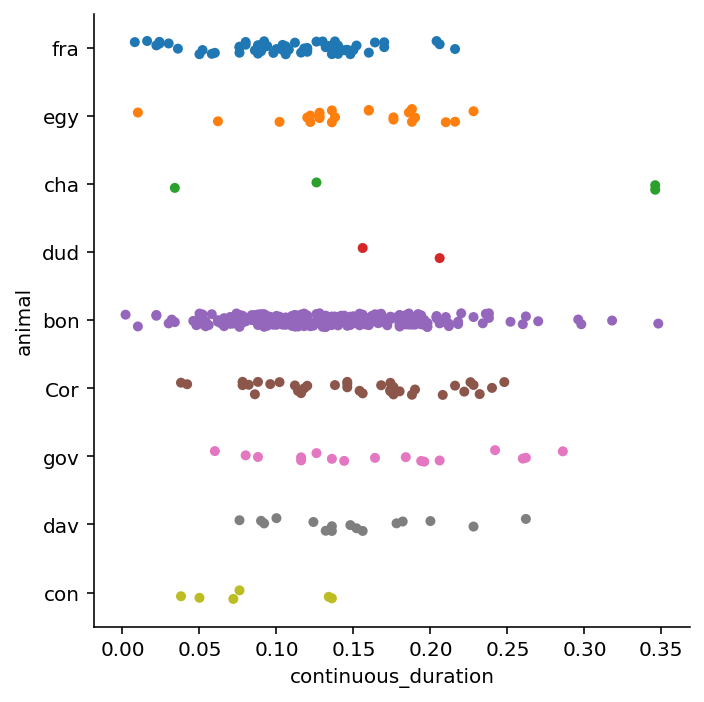

In [15]:
sns.catplot(x='continuous_duration', y='animal', data=replay_info.reset_index().replace(0.0, np.nan), kind="strip", jitter=True, aspect=1)

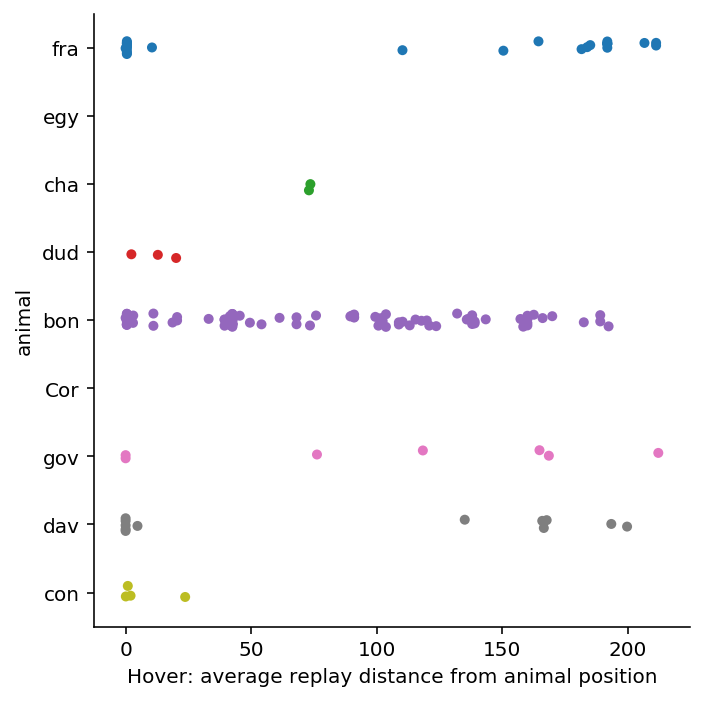

In [16]:
sns.catplot(x='hover_avg_replay_distance', y='animal', data=replay_info.reset_index(), kind="strip", jitter=True)
plt.xlabel('Hover: average replay distance from animal position');

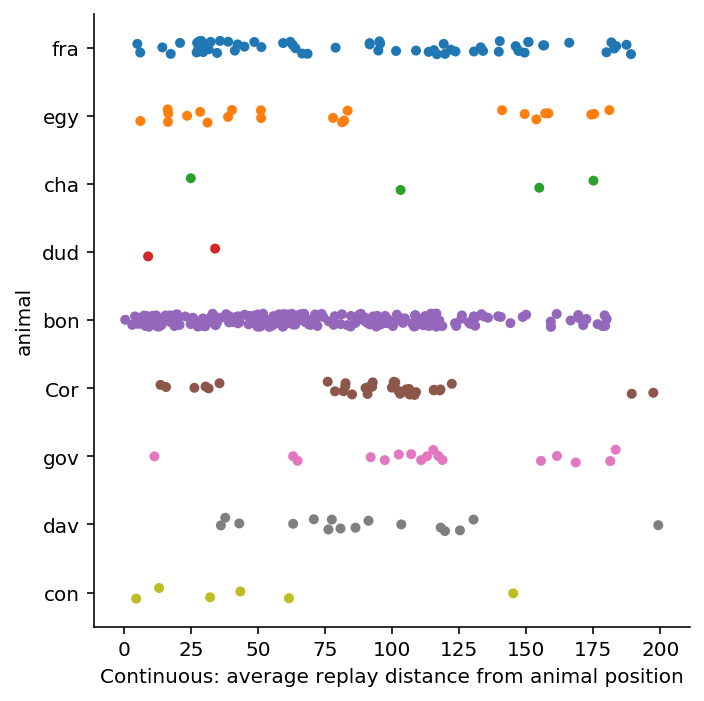

In [17]:
sns.catplot(x='continuous_avg_replay_distance', y='animal', data=replay_info.reset_index(), kind="strip", jitter=True, aspect=1)
plt.xlabel('Continuous: average replay distance from animal position');

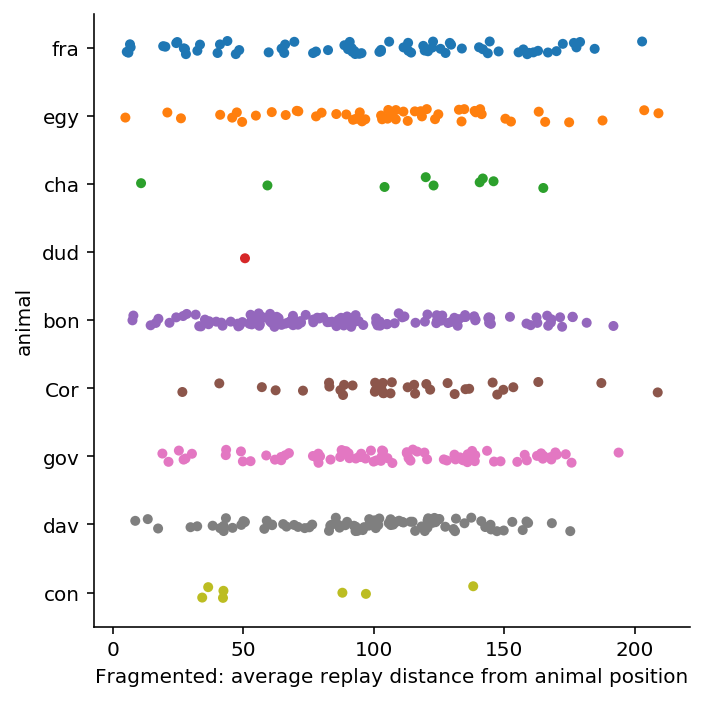

In [18]:
sns.catplot(x='fragmented_avg_replay_distance', y='animal', data=replay_info.reset_index(), kind="strip", jitter=True, aspect=1)
plt.xlabel('Fragmented: average replay distance from animal position');

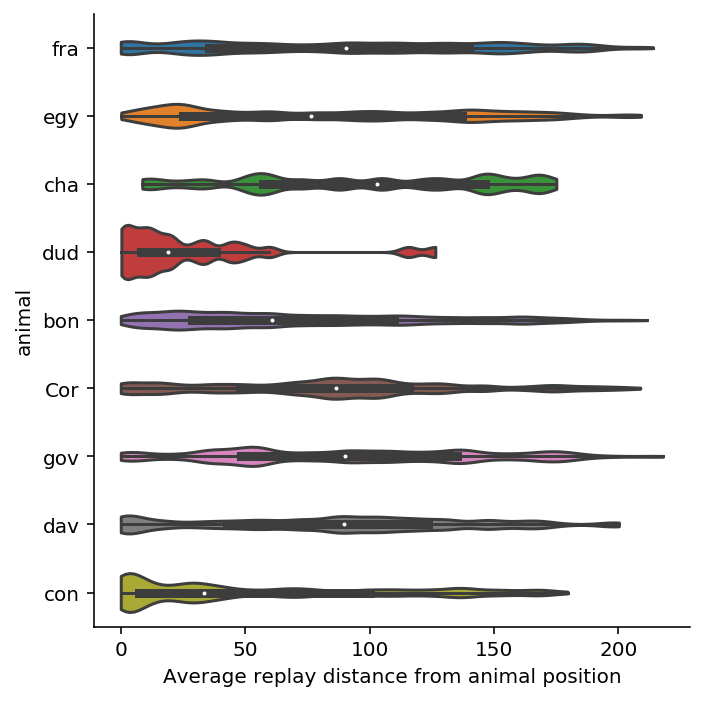

In [19]:
sns.catplot(x='avg_replay_distance', y='animal', data=replay_info.reset_index(), kind="violin", jitter=True, aspect=1, cut=0, bw=0.1)
plt.xlabel('Average replay distance from animal position');

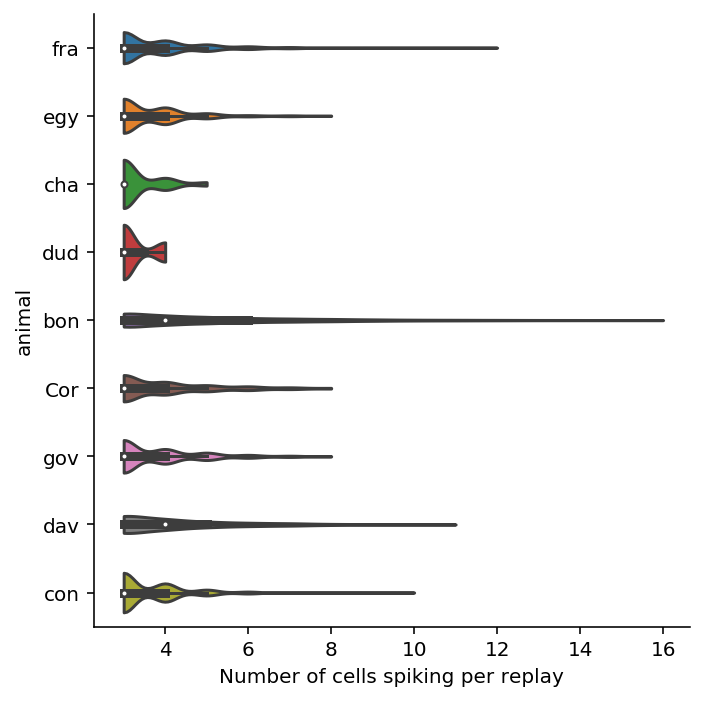

In [20]:
sns.catplot(x='n_unique_spiking', y='animal', data=replay_info.reset_index(), kind="violin", jitter=True, aspect=1, cut=0)
plt.xlabel('Number of cells spiking per replay');

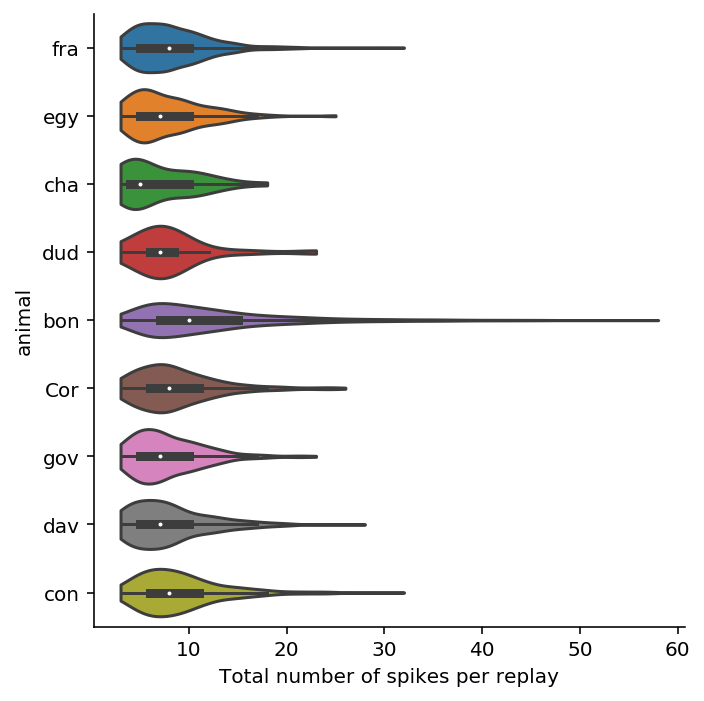

In [21]:
sns.catplot(x='n_total_spikes', y='animal', data=replay_info.reset_index(), kind="violin", aspect=1, cut=0)
plt.xlabel('Total number of spikes per replay');

# Clusterless

In [22]:
data_type, dim = 'clusterless', '1D'
n_unique_spiking = 2

file_paths = glob(os.path.join(PROCESSED_DATA_DIR, f'*_{data_type}_{dim}_replay_info.csv'))
replay_info = (pd.concat(
                 [add_animal_info(file_path, pd.read_csv(file_path)) for file_path in file_paths], axis=0)
               .set_index(['animal', 'day', 'epoch', 'ripple_number']))
replay_info = replay_info.loc[replay_info.n_unique_spiking >= n_unique_spiking]

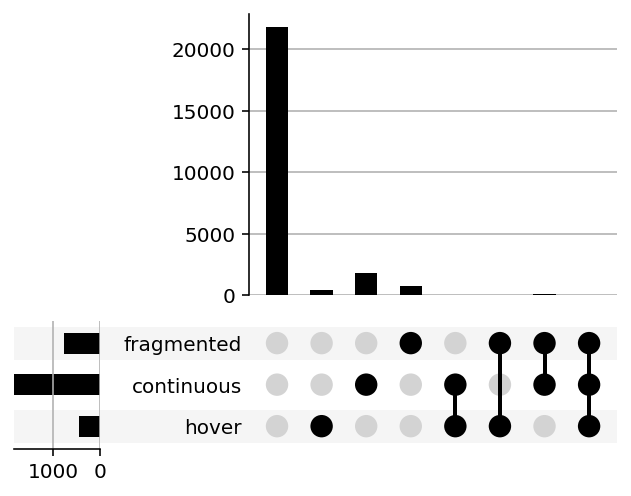

In [23]:
plot_category_counts(replay_info);

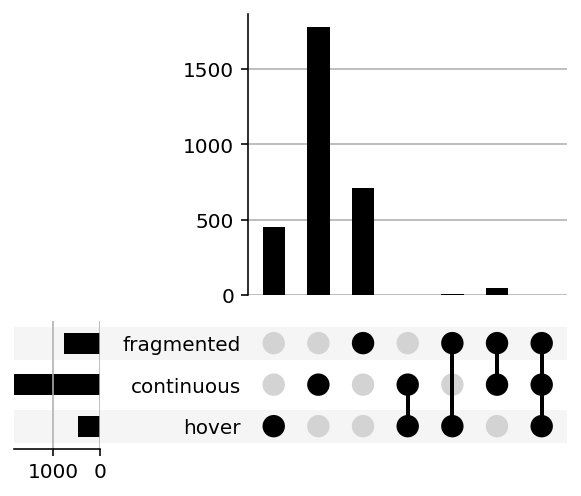

In [24]:
plot_category_counts(replay_info.loc[replay_info.is_classified]);

In [25]:
replay_info.reset_index().groupby('animal').hover.sum()

animal
Cor      22.0
bon      30.0
cha       2.0
con       1.0
dav      56.0
dud       1.0
egy      58.0
fra      20.0
gov      42.0
remy    232.0
Name: hover, dtype: float64

In [26]:
replay_info.reset_index().groupby('animal').continuous.sum()

animal
Cor     149.0
bon     913.0
cha      11.0
con      32.0
dav      28.0
dud      14.0
egy      35.0
fra     315.0
gov     107.0
remy    228.0
Name: continuous, dtype: float64

In [27]:
replay_info.reset_index().groupby('animal').fragmented.sum()

animal
Cor      48.0
bon     370.0
cha      17.0
con      13.0
dav       4.0
dud       1.0
egy       1.0
fra     184.0
gov      22.0
remy    109.0
Name: fragmented, dtype: float64

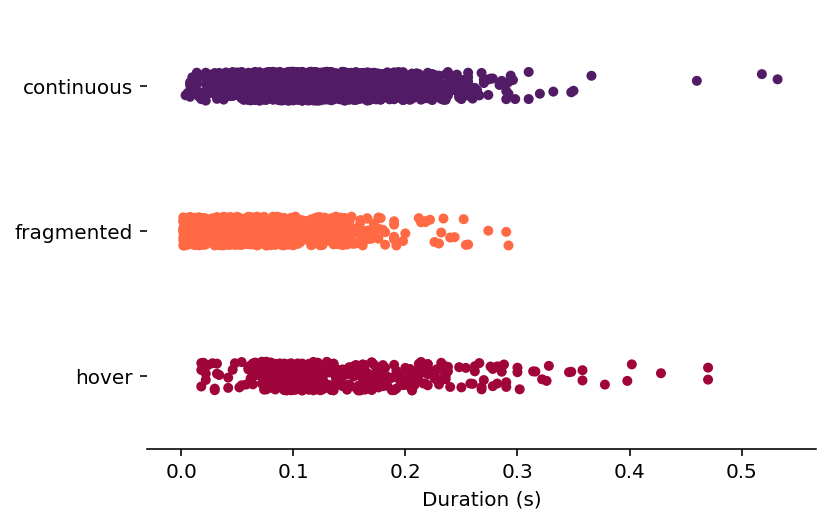

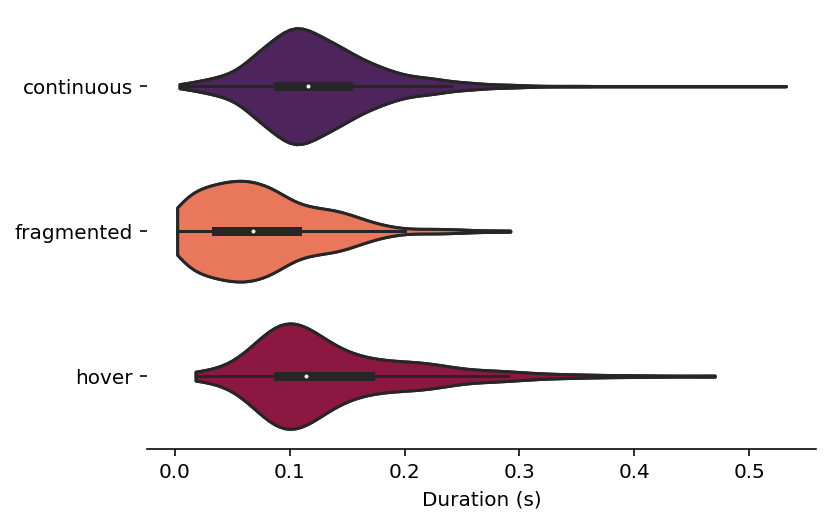

In [28]:
plt.figure()
plot_category_duration(replay_info)

plt.figure()
is_duration_col = replay_info.columns.str.endswith('_duration')
zero_mask = np.isclose(replay_info.loc[:, is_duration_col], 0.0)
sns.violinplot(data=(replay_info.loc[:, is_duration_col].mask(zero_mask)
                    .rename(columns=lambda c: c.split('_')[0])),
              order=['continuous', 'fragmented', 'hover'],
              orient='horizontal',
              palette=STATE_COLORS, cut=0)
plt.xlabel('Duration (s)')
sns.despine(left=True)

hover_pct = 100 * (replay_info.hover_duration / replay_info.duration).replace(0.0, np.nan).rename('hover_percentage')
sns.violinplot(data=(replay_info.loc[:, is_duration_col].mask(zero_mask)
                    .rename(columns=lambda c: c.split('_')[0])),
              order=['continuous', 'fragmented', 'hover'],
              orient='horizontal',
              palette=STATE_COLORS, cut=0)
plt.xlabel('Duration (s)')
sns.despine(left=True)

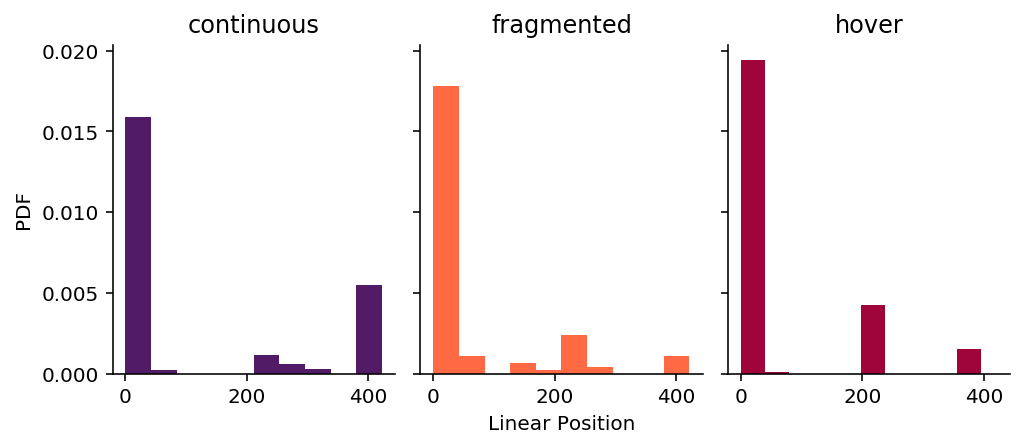

In [29]:
from src.parameters import STATE_COLORS

state_names = ['continuous', 'fragmented', 'hover']
fig, axes = plt.subplots(1, len(state_names), figsize=(7, 3),
                         sharex=True, sharey=True, constrained_layout=True)

for ax, state_name in zip(axes.flat, state_names):
    ax.hist(replay_info.loc[replay_info[state_name]].linear_position2,
            density=True, bins=10, color=STATE_COLORS[state_name])
    ax.set_title(state_name)
    
axes.flat[len(state_names) // 2].set_xlabel('Linear Position')
axes[0].set_ylabel('PDF')
sns.despine()

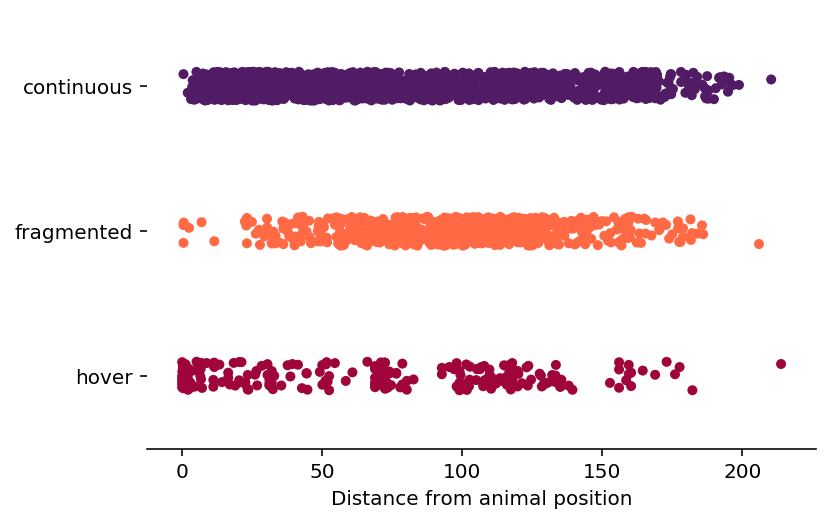

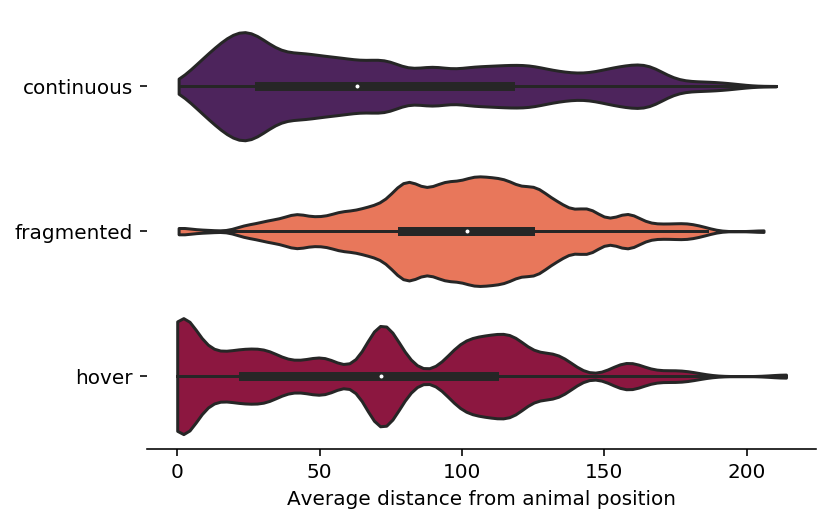

In [30]:
is_col = replay_info.columns.str.endswith('_replay_distance')
sns.stripplot(data=(replay_info.loc[:, is_col]
                    .rename(columns=lambda c: c.split('_')[0])),
              order=['continuous', 'fragmented', 'hover'],
              orient='horizontal',
              palette=STATE_COLORS)
plt.xlabel('Distance from animal position')
sns.despine(left=True)

plt.figure()
is_col = replay_info.columns.str.endswith('_replay_distance')
sns.violinplot(data=(replay_info.loc[:, is_col]
                    .rename(columns=lambda c: c.split('_')[0])),
              order=['continuous', 'fragmented', 'hover'],
              orient='horizontal',
              palette=STATE_COLORS, cut=0, bw=0.1)
plt.xlabel('Average distance from animal position')
sns.despine(left=True)

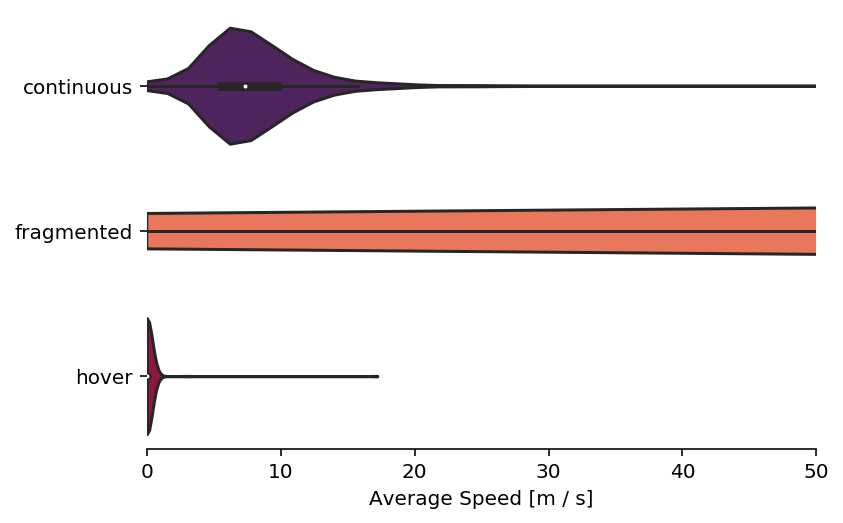

In [31]:
is_col = replay_info.columns.str.endswith('_replay_speed')
sns.violinplot(data=10000 * (replay_info.loc[:, is_col]
                    .rename(columns=lambda c: c.split('_')[0])),
              order=['continuous', 'fragmented', 'hover'],
              orient='horizontal',
              palette=STATE_COLORS, cut=0, scale='width')
plt.xlabel('Average Speed [m / s]')
plt.xlim((-0.001, 50))
sns.despine(left=True)

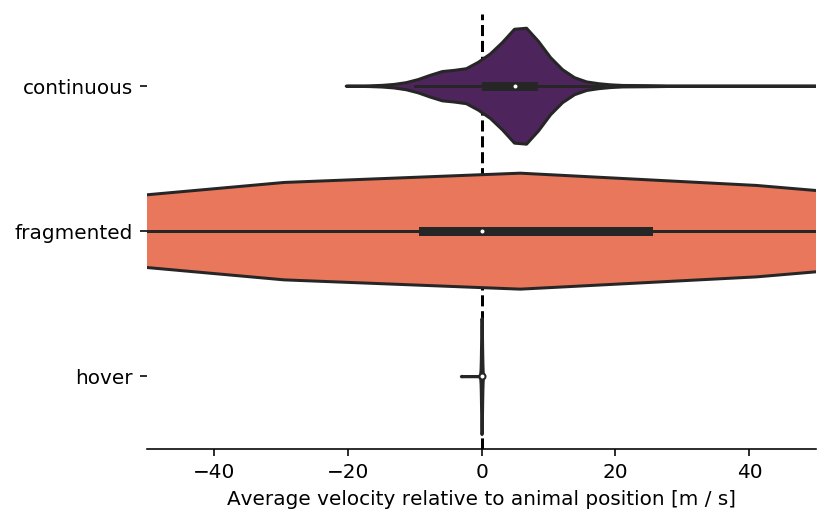

In [32]:
is_col = replay_info.columns.str.endswith('_replay_velocity')
sns.violinplot(data=10000 * (replay_info.loc[:, is_col]
                    .rename(columns=lambda c: c.split('_')[0])),
              order=['continuous', 'fragmented', 'hover'],
              orient='horizontal',
              palette=STATE_COLORS, scale='width')
plt.xlabel('Average velocity relative to animal position [m / s]')
plt.xlim([-50, 50])
plt.axvline(0, color='black', linestyle='--', zorder=0)
sns.despine(left=True)

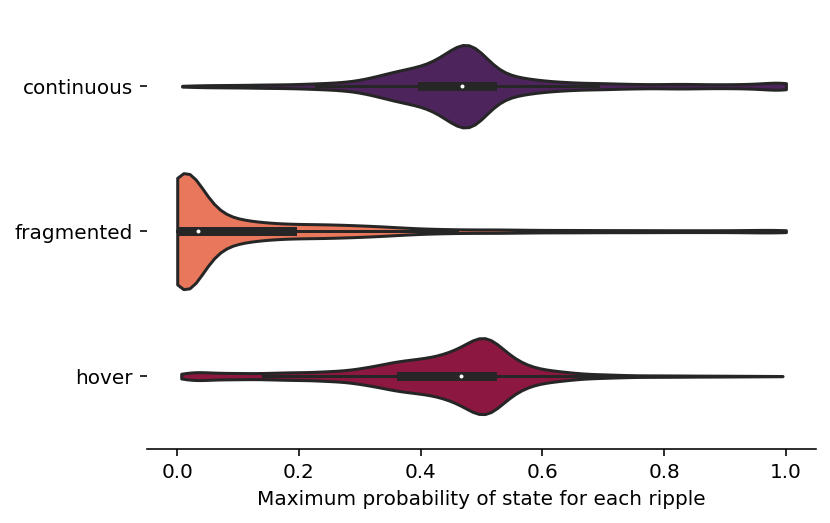

In [33]:
plt.figure()
is_col = replay_info.columns.str.endswith('_max_probability')
sns.violinplot(data=(replay_info.loc[:, is_col]
                    .rename(columns=lambda c: c.split('_')[0])),
              order=['continuous', 'fragmented', 'hover'],
              orient='horizontal',
              palette=STATE_COLORS, cut=0)
plt.xlabel('Maximum probability of state for each ripple')
sns.despine(left=True)

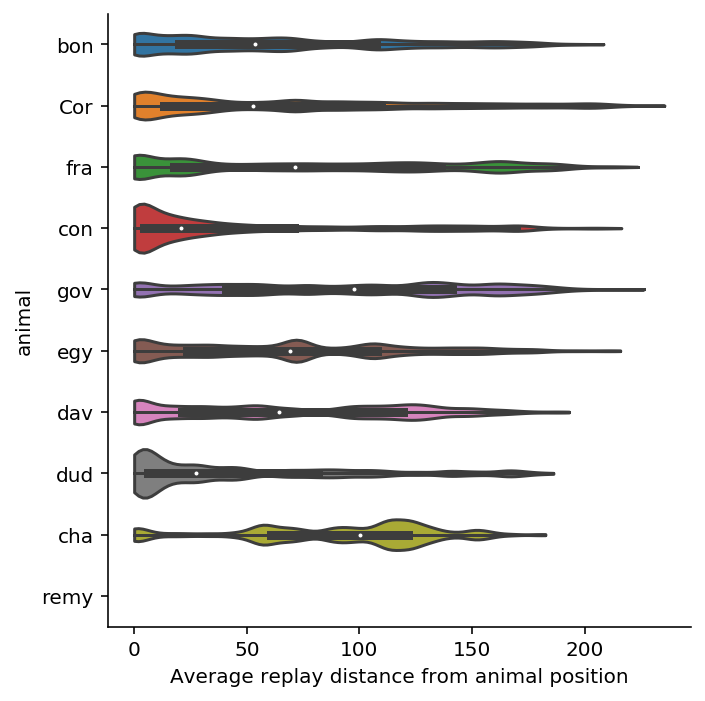

In [34]:
sns.catplot(x='avg_replay_distance', y='animal', data=replay_info.reset_index(), kind="violin", jitter=True, aspect=1, cut=0, bw=0.1)
plt.xlabel('Average replay distance from animal position');

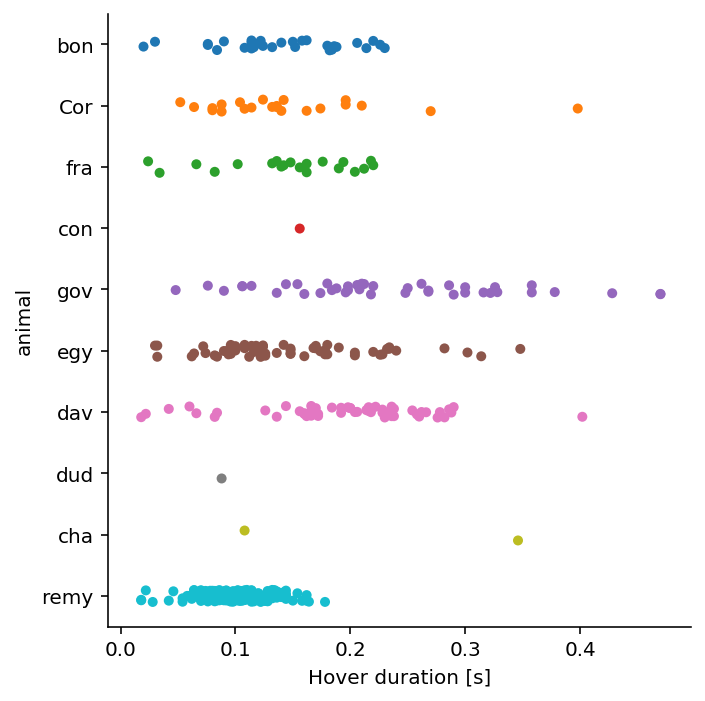

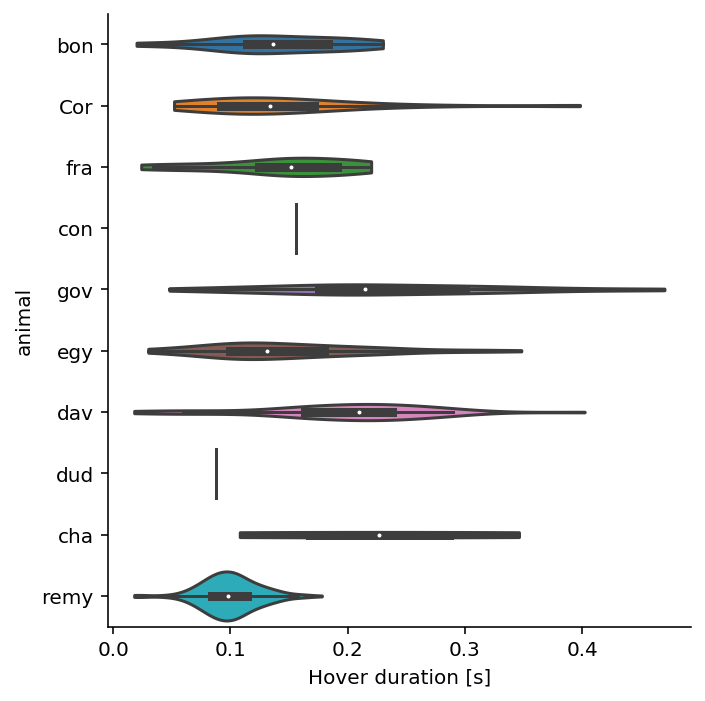

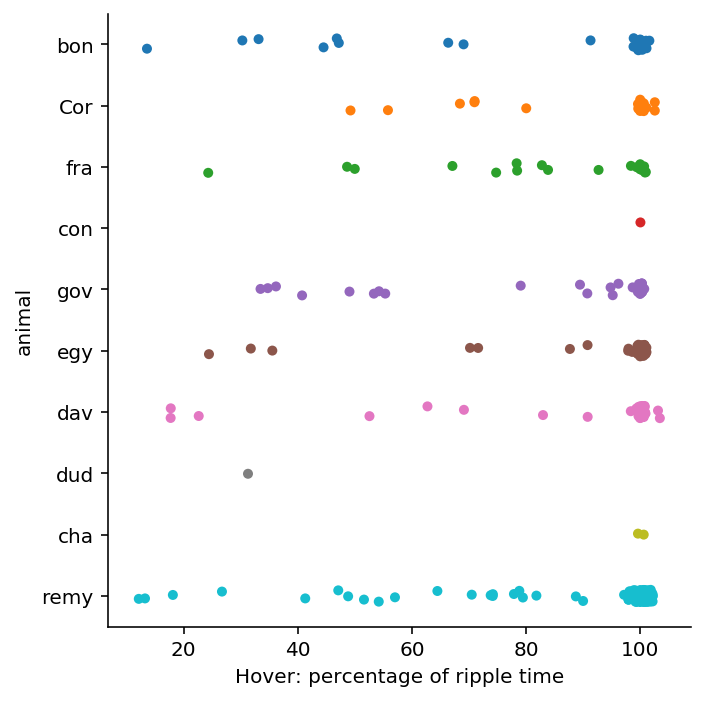

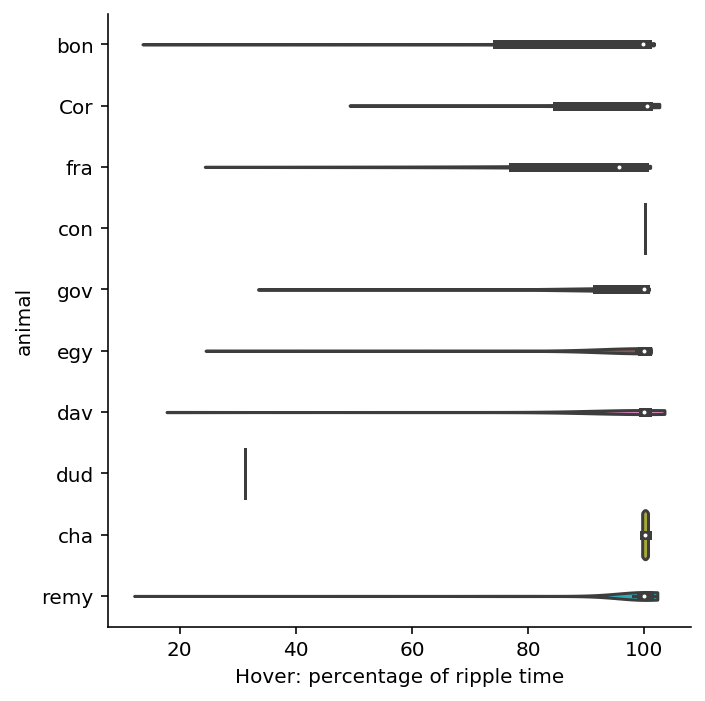

In [35]:
sns.catplot(x='hover_duration', y='animal', data=replay_info.reset_index().replace(0.0, np.nan), kind="strip", jitter=True, aspect=1)
plt.xlabel('Hover duration [s]');

sns.catplot(x='hover_duration', y='animal', data=replay_info.reset_index().replace(0.0, np.nan), kind="violin", jitter=True, aspect=1, cut=0)
plt.xlabel('Hover duration [s]');

hover_pct = 100 * (replay_info.hover_duration / replay_info.duration).replace(0.0, np.nan).rename('hover_percentage')
sns.catplot(x='hover_percentage', y='animal', data=hover_pct.reset_index().replace(0.0, np.nan), kind="strip", jitter=True)
plt.xlabel('Hover: percentage of ripple time');

sns.catplot(x='hover_percentage', y='animal', data=hover_pct.reset_index().replace(0.0, np.nan), kind="violin", jitter=True, aspect=1, cut=0)
plt.xlabel('Hover: percentage of ripple time');

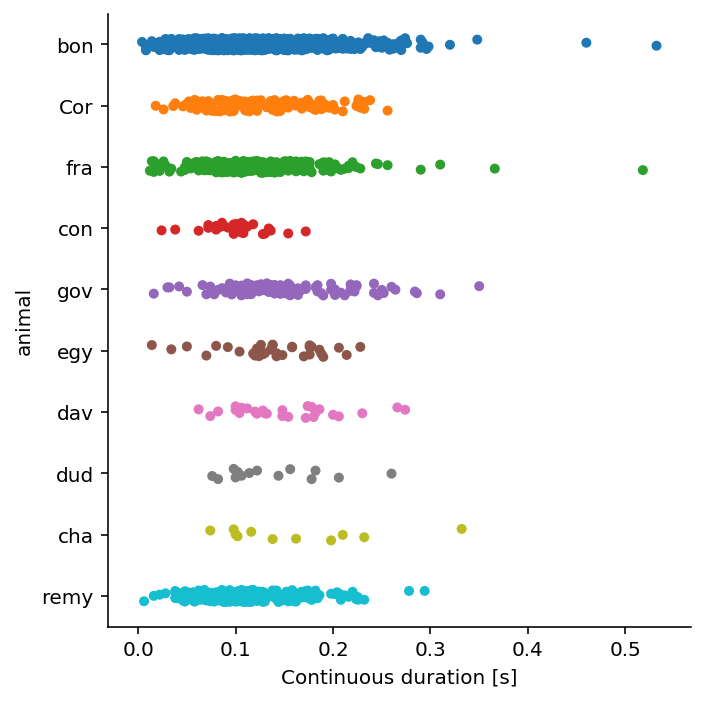

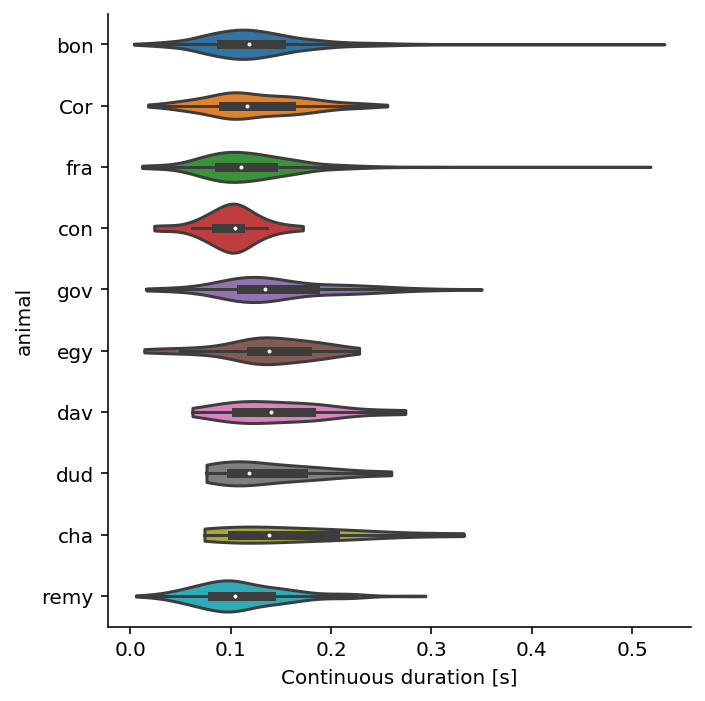

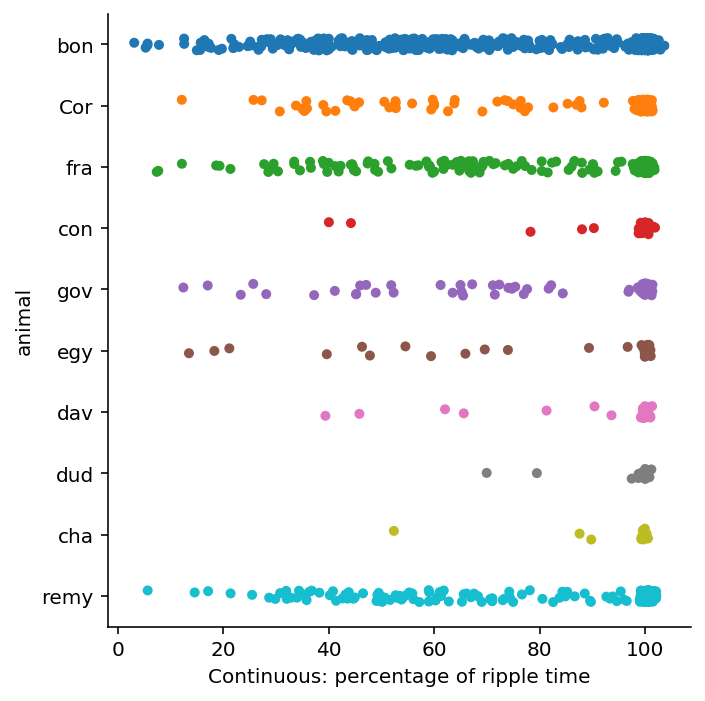

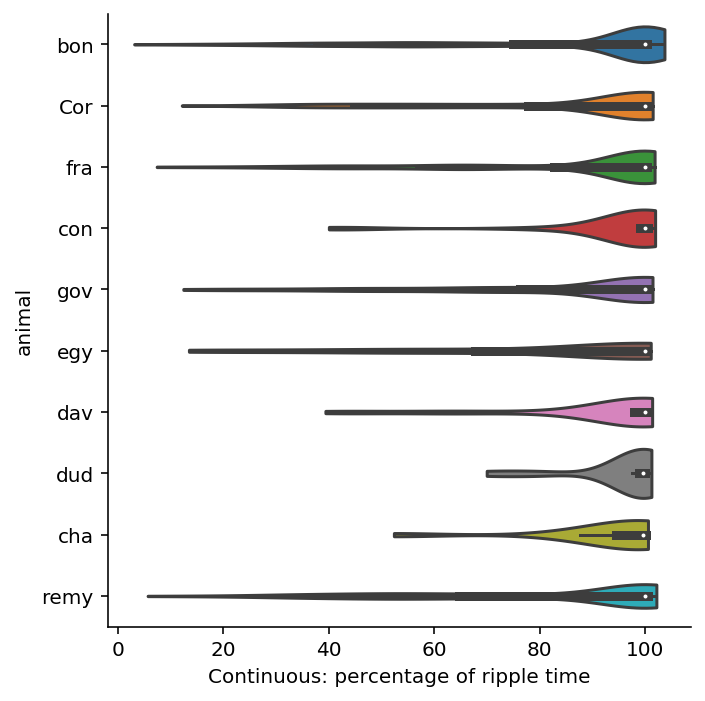

In [36]:
sns.catplot(x='continuous_duration', y='animal', data=replay_info.reset_index().replace(0.0, np.nan), kind="strip", jitter=True, aspect=1)
plt.xlabel('Continuous duration [s]');

sns.catplot(x='continuous_duration', y='animal', data=replay_info.reset_index().replace(0.0, np.nan), kind="violin", jitter=True, aspect=1, cut=0)
plt.xlabel('Continuous duration [s]');

continuous_pct = 100 * (replay_info.continuous_duration / replay_info.duration).replace(0.0, np.nan).rename('continuous_percentage')
sns.catplot(x='continuous_percentage', y='animal', data=continuous_pct.reset_index().replace(0.0, np.nan), kind="strip", jitter=True)
plt.xlabel('Continuous: percentage of ripple time');

sns.catplot(x='continuous_percentage', y='animal', data=continuous_pct.reset_index().replace(0.0, np.nan), kind="violin", jitter=True, aspect=1, cut=0)
plt.xlabel('Continuous: percentage of ripple time');

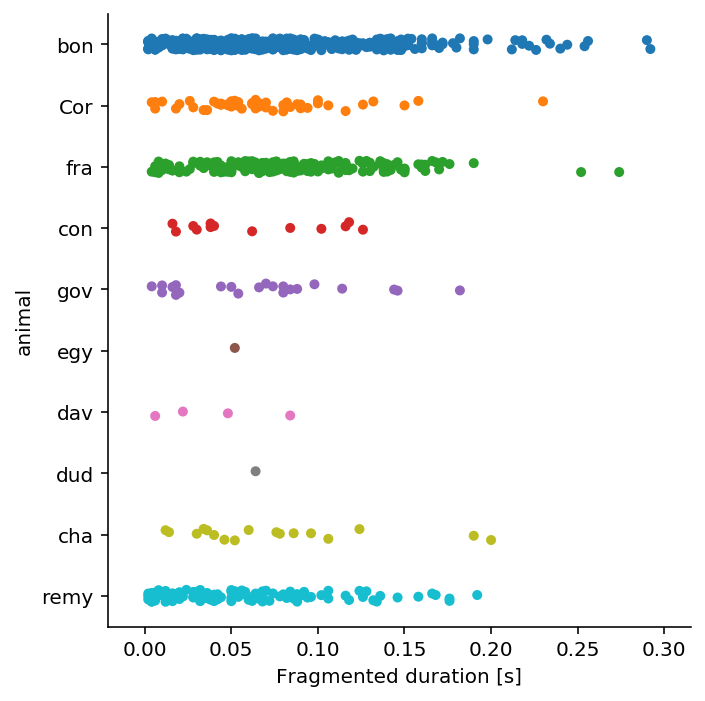

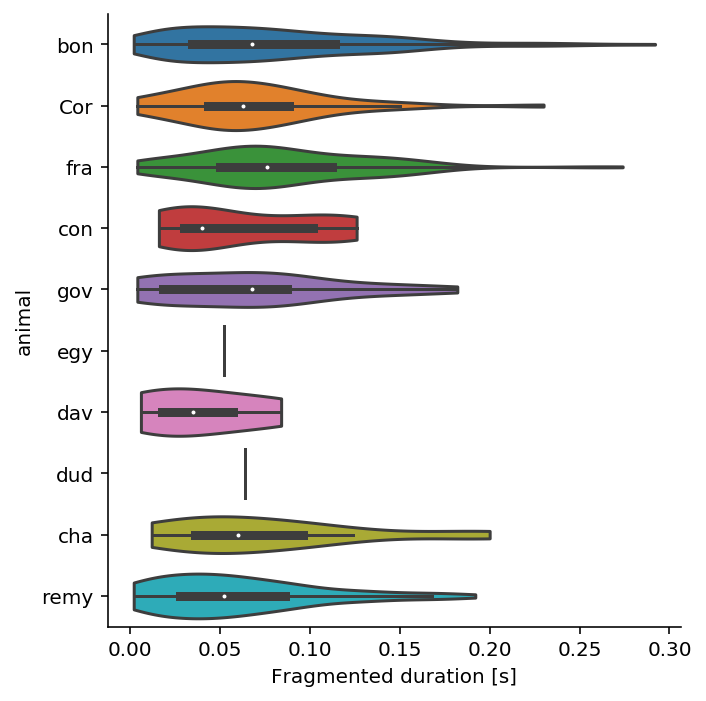

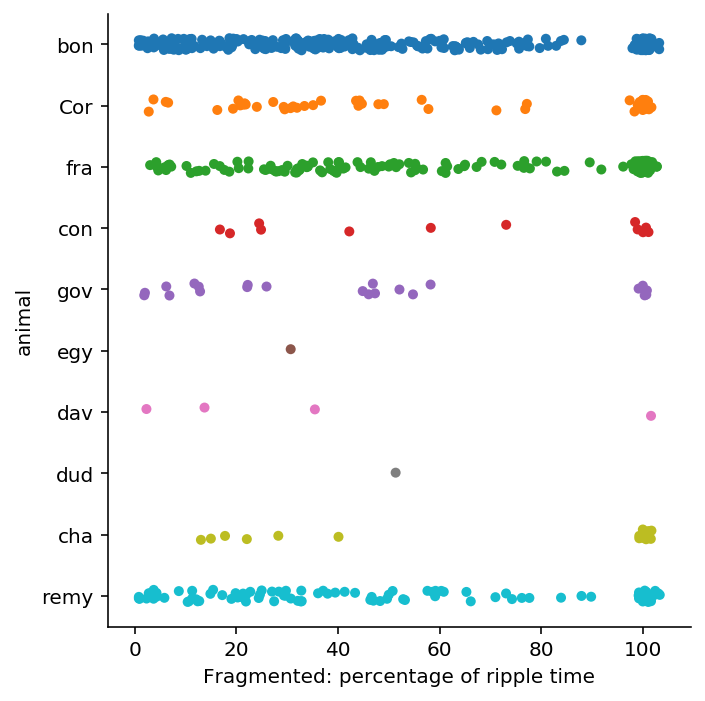

In [37]:
sns.catplot(x='fragmented_duration', y='animal', data=replay_info.reset_index().replace(0.0, np.nan), kind="strip", jitter=True, aspect=1)
plt.xlabel('Fragmented duration [s]');

sns.catplot(x='fragmented_duration', y='animal', data=replay_info.reset_index().replace(0.0, np.nan), kind="violin", jitter=True, aspect=1, cut=0)
plt.xlabel('Fragmented duration [s]');

fragmented_pct = 100 * (replay_info.fragmented_duration / replay_info.duration).replace(0.0, np.nan).rename('fragmented_percentage')
sns.catplot(x='fragmented_percentage', y='animal', data=fragmented_pct.reset_index().replace(0.0, np.nan), kind="strip", jitter=True)
plt.xlabel('Fragmented: percentage of ripple time');

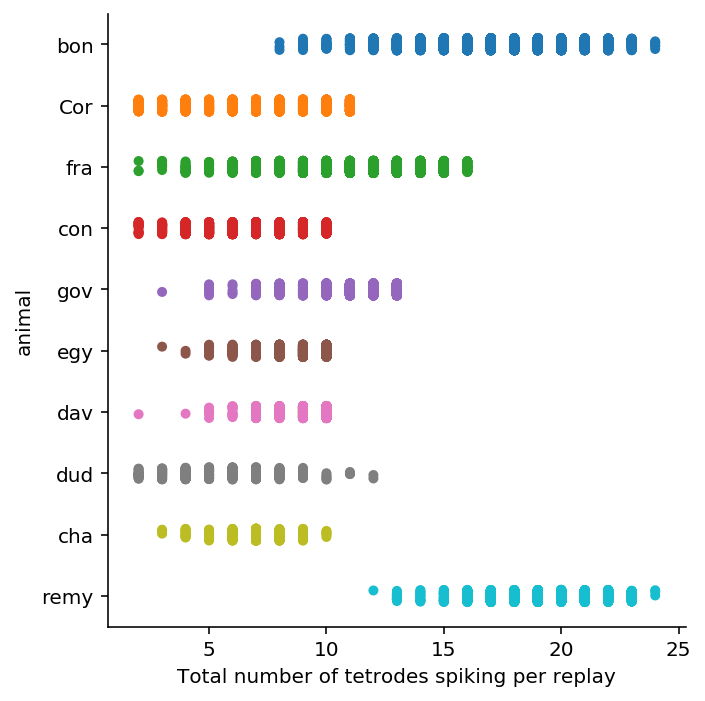

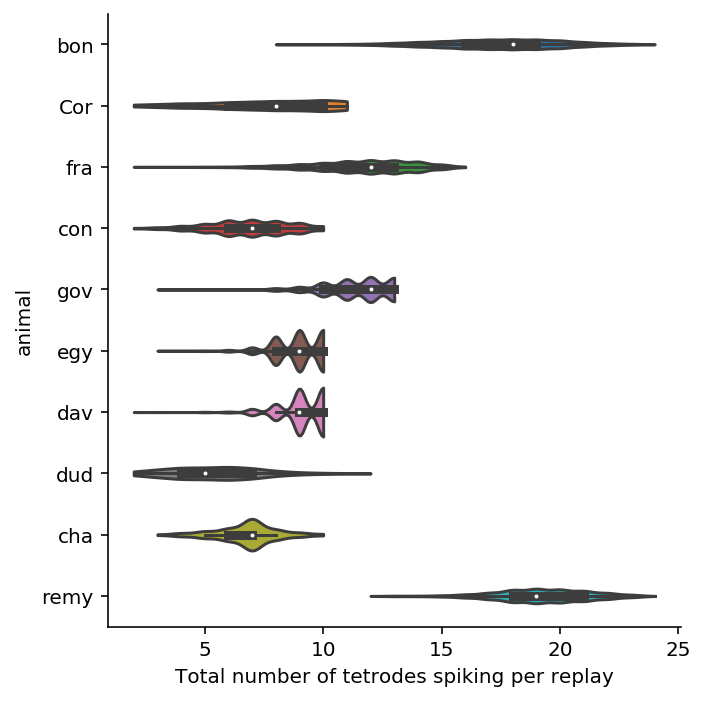

In [38]:
sns.catplot(x='n_unique_spiking', y='animal', data=replay_info.reset_index(), kind='strip', aspect=1)
plt.xlabel('Total number of tetrodes spiking per replay');

sns.catplot(x='n_unique_spiking', y='animal', data=replay_info.reset_index(), kind='violin', aspect=1, cut=0)
plt.xlabel('Total number of tetrodes spiking per replay');

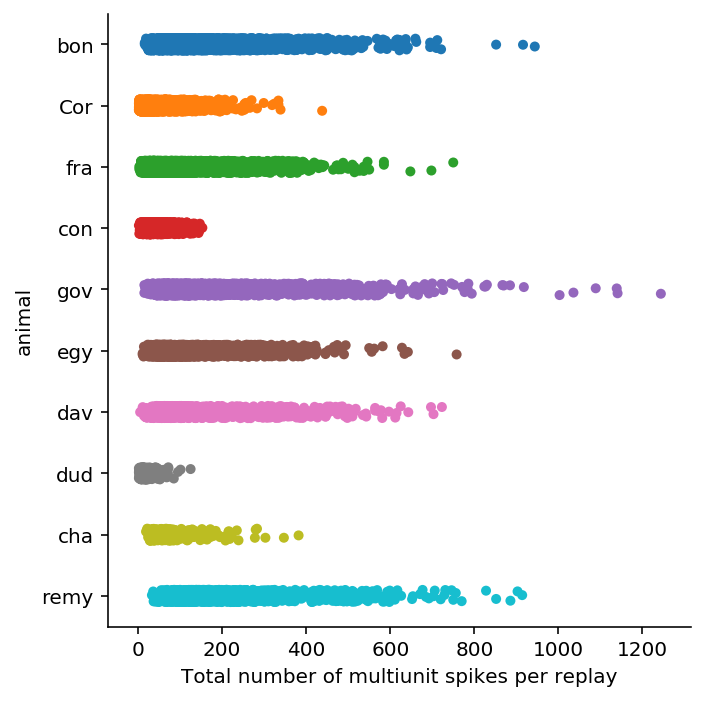

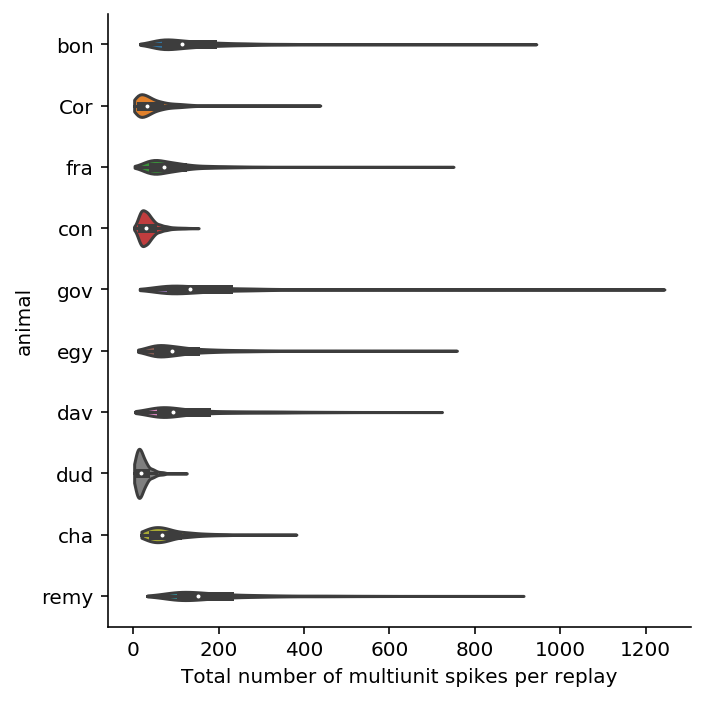

In [39]:
sns.catplot(x='n_total_spikes', y='animal', data=replay_info.reset_index(), kind="strip",)
plt.xlabel('Total number of multiunit spikes per replay');

sns.catplot(x='n_total_spikes', y='animal', data=replay_info.reset_index(), kind="violin", cut=0)
plt.xlabel('Total number of multiunit spikes per replay');

# Epoch Info

In [40]:
from src.parameters import ANIMALS, _BRAIN_AREAS
from loren_frank_data_processing import make_epochs_dataframe, make_neuron_dataframe, make_tetrode_dataframe

epoch_info = make_epochs_dataframe(ANIMALS)
neuron_info = make_neuron_dataframe(ANIMALS)
neuron_info = neuron_info.loc[
    (neuron_info.type == 'principal') &
    (neuron_info.numspikes > 100) &
    neuron_info.area.isin(_BRAIN_AREAS)]
n_neurons = (neuron_info
             .groupby(['animal', 'day', 'epoch'])
             .neuron_id
             .agg(len)
             .rename('n_neurons')
             .to_frame())

epoch_info = epoch_info.join(n_neurons)
is_w_track = (epoch_info.environment
              .isin(['TrackA', 'TrackB', 'WTrackA', 'WTrackB', 'wtrack']))
epoch_info = epoch_info[is_w_track & ((epoch_info.n_neurons > 9) | (epoch_info.index.get_level_values('animal') == 'remy'))]

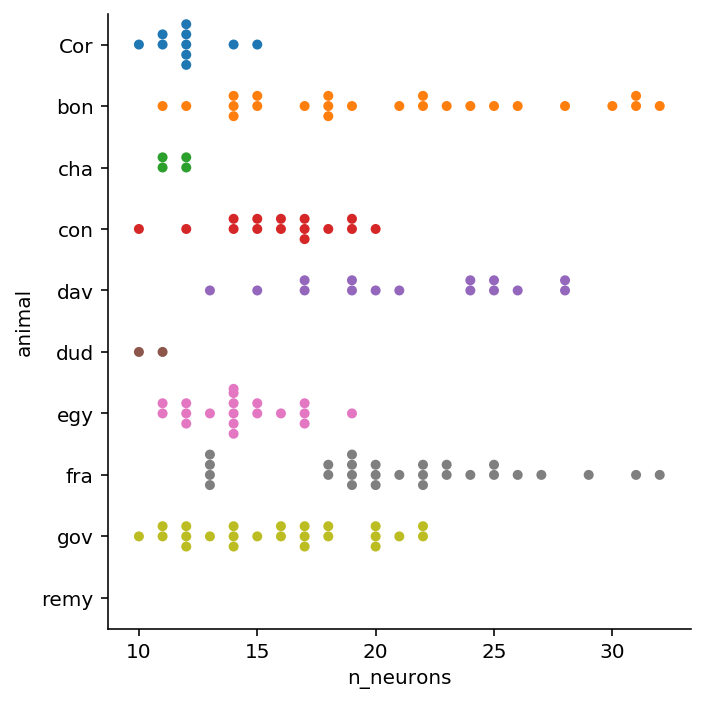

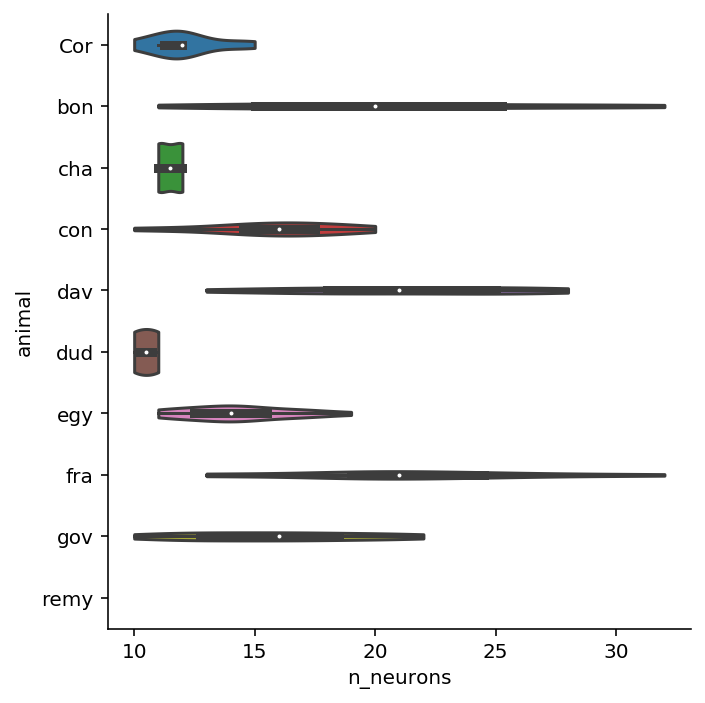

In [41]:
sns.catplot(x='n_neurons', y='animal', data=epoch_info.reset_index(), kind='swarm')
sns.catplot(x='n_neurons', y='animal', data=epoch_info.reset_index(), kind='violin', cut=0)

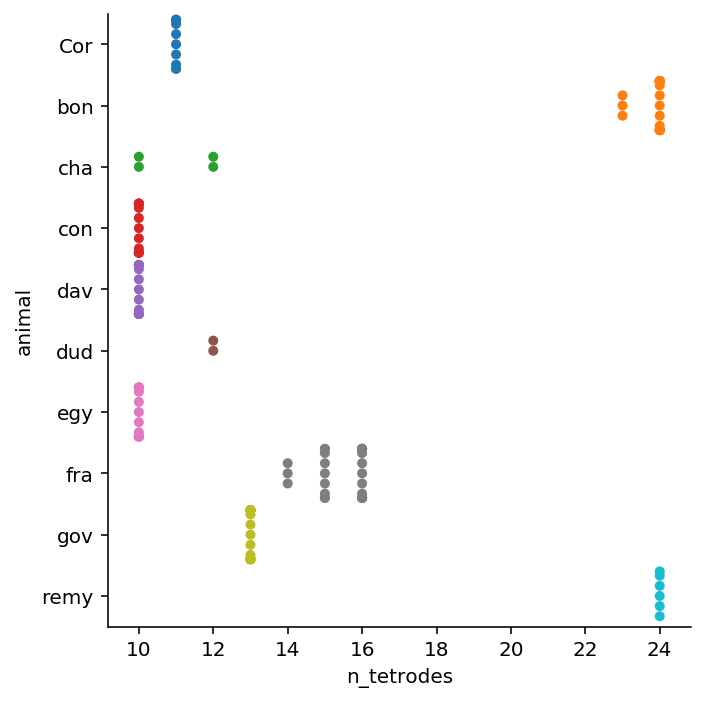

In [42]:
tetrode_info = make_tetrode_dataframe(ANIMALS)
is_brain_areas = (
        tetrode_info.area.astype(str).str.upper().isin(_BRAIN_AREAS))
n_tetrodes = (tetrode_info.loc[is_brain_areas]
              .groupby(['animal', 'day', 'epoch'])
              .tetrode_id
              .agg(len)
              .rename('n_tetrodes')
              .to_frame()
              .loc[epoch_info.index])
sns.catplot(x='n_tetrodes', y='animal', data=n_tetrodes.reset_index(), kind='swarm')